<a href="https://www.kaggle.com/code/mohamedmahmoud111/dsp-for-ecg?scriptVersionId=235878134" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Exploring the MIT-BIH Arrhythmia Database for ECG Signal Analysis
The MIT-BIH Arrhythmia Database is a well-known medical dataset that contains electrocardiogram (ECG) recordings from a number of patients suffering from cardiac arrhythmias. It was developed through a collaboration between the Massachusetts Institute of Technology (MIT) and Beth Israel Hospital, and is widely used in medical research, especially in the development of artificial intelligence models for analyzing biosignals and detecting cardiac abnormalities.

The dataset consists of 234 files, including ECG signals and annotations that indicate the type of each heartbeat, making it highly suitable for machine learning applications in heartbeat classification and arrhythmia detection.



<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Importing Libraries</b>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from scipy.signal import butter, filtfilt
import scipy # digital signal processing
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# LOADING DATASET

In [2]:
# Reads the CSV file '100.csv' from the specified path and loads it into a DataFrame called 'df1' using Pandas
df1 = pd.read_csv("/kaggle/input/mit-bih-arrhythmia-database-modern-2023/100.csv")
df1.head()

,Unnamed: 0,time_ms,MLII,V5
0,0,0.000000,-0.145,-0.065
1,1,2.777778,-0.145,-0.065
2,2,5.555556,-0.145,-0.065
3,3,8.333333,-0.145,-0.065
4,4,11.111111,-0.145,-0.065


### Column Explanation:
Unnamed: 0     → Default index column, usually dropped.

time_ms        → Time in milliseconds.

MLII           → ECG signal from Lead MLII.





# Test:
The code plots the ECG signal from the MLII lead over time in milliseconds, with a title, axis labels, and a grid enabled for better readability.

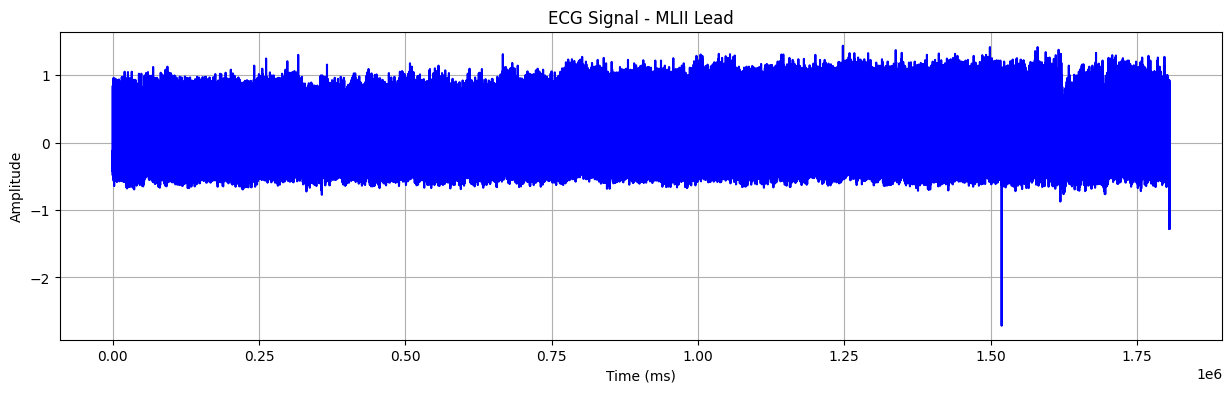

In [3]:
plt.figure(figsize=(15, 4))
plt.plot(df1['time_ms'], df1['MLII'], color='blue')
plt.title("ECG Signal - MLII Lead")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

The code reads the first 10 CSV files from the MIT-BIH database, removes any unwanted columns, adds a new column with the source file name, and then combines all the data into a single DataFrame.


In [4]:
folder_path = "/kaggle/input/mit-bih-arrhythmia-database-modern-2023"

csv_files = sorted(glob.glob(folder_path + "/*.csv"))[:10]

all_data = []

for file in csv_files:
    df = pd.read_csv(file)
    
    if 'named: 0' in df.columns:
        df = df.drop(columns=['named: 0'])

    
    df['source_file'] = file.split('/')[-1]
    
    all_data.append(df)

combined_df = pd.concat(all_data, ignore_index=True)


# DATA INSPECTION:

In [5]:
combined_df

,Unnamed: 0,time_ms,MLII,V5,source_file,V1,V2
0,0,0.000000e+00,-0.145,-0.065,100.csv,NaN,NaN
1,1,2.777778e+00,-0.145,-0.065,100.csv,NaN,NaN
2,2,5.555556e+00,-0.145,-0.065,100.csv,NaN,NaN
3,3,8.333333e+00,-0.145,-0.065,100.csv,NaN,NaN
4,4,1.111111e+01,-0.145,-0.065,100.csv,NaN,NaN
...,...,...,...,...,...,...,...
6499995,649995,1.805542e+06,-0.900,NaN,109.csv,0.355,NaN
6499996,649996,1.805544e+06,-0.910,NaN,109.csv,0.355,NaN
6499997,649997,1.805547e+06,-0.920,NaN,109.csv,0.360,NaN
6499998,649998,1.805550e+06,-0.910,NaN,109.csv,0.365,NaN


### Column Descriptions:
Unnamed: 0     → Default index column, usually dropped.

time_ms        → Time in milliseconds.

MLII           → ECG signal from Lead MLII.

V5             → ECG signal from Lead V5.

source_file    → Name of the source CSV file.

V1             → ECG signal from Lead V1.

V2             → ECG signal from Lead V2.


In [6]:
combined_df.shape

(6500000, 7)

In [7]:
combined_df.info()  # Displays summary info about the combined DataFrame, including column names, data types, and non-null counts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500000 entries, 0 to 6499999
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   time_ms      float64
 2   MLII         float64
 3   V5           float64
 4   source_file  object 
 5   V1           float64
 6   V2           float64
dtypes: float64(5), int64(1), object(1)
memory usage: 347.1+ MB


In [8]:
combined_df['source_file'][combined_df['V1'].notna()].unique()
# Returns the unique source files that contain non-null values in the V1 lead column.

array(['101.csv', '105.csv', '106.csv', '107.csv', '108.csv', '109.csv'],
      dtype=object)

Visualizes pairwise relationships between the ECG leads: MLII, V5, V1, and V2 using a pair plot.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

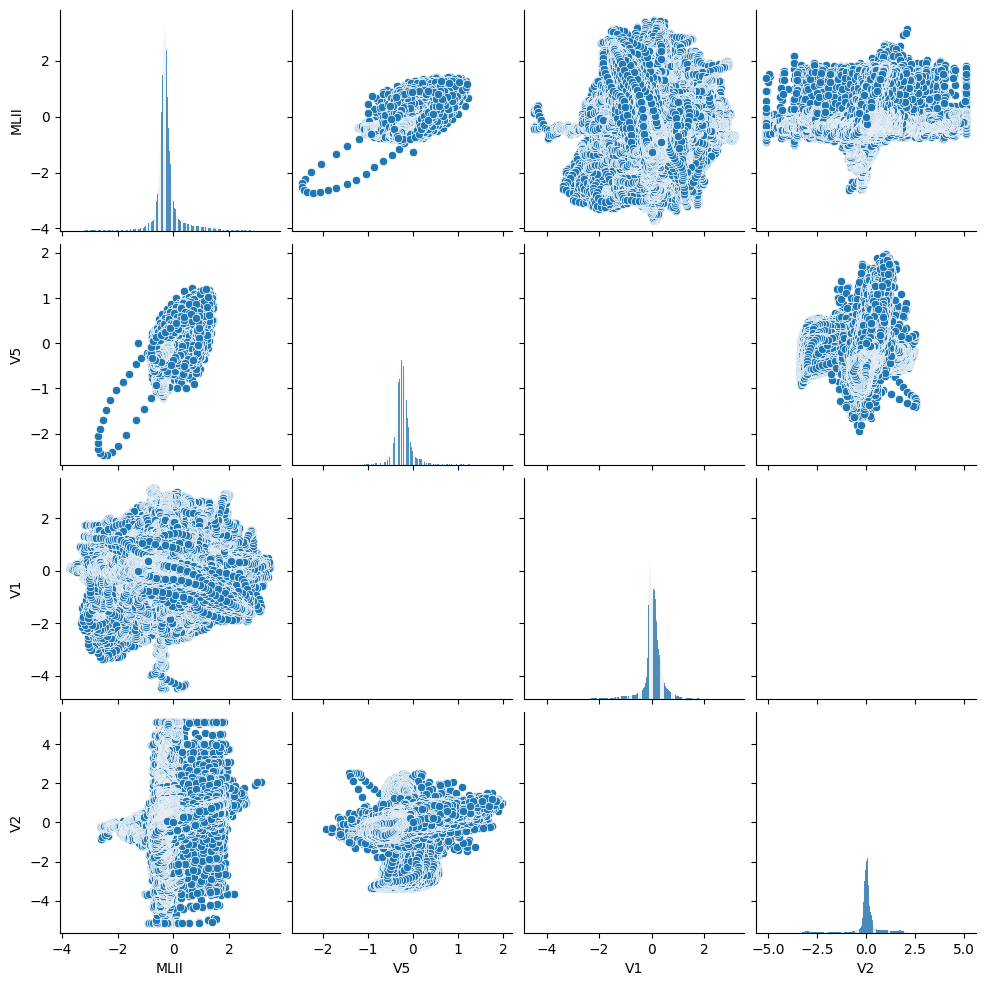

In [9]:
sns.pairplot(combined_df[['MLII', 'V5','V1','V2']])  
plt.show()

In [10]:
df = combined_df[['time_ms', 'MLII', 'V5', 'source_file']]
df.head()

,time_ms,MLII,V5,source_file
0,0.000000,-0.145,-0.065,100.csv
1,2.777778,-0.145,-0.065,100.csv
2,5.555556,-0.145,-0.065,100.csv
3,8.333333,-0.145,-0.065,100.csv
4,11.111111,-0.145,-0.065,100.csv


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_ms,6500000.0,902776.388889,521219.033112,0.000,451388.194444,902776.388889,1.354165e+06,1.805553e+06
MLII,5200000.0,-0.239573,0.446567,-3.715,-0.400000,-0.290000,-1.600000e-01,3.465000e+00
V5,1950000.0,-0.220655,0.202053,-2.465,-0.315000,-0.240000,-1.550000e-01,1.975000e+00


# DATA CLEANING:

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Checking if there are any null values present in the dataset or not ?</b>
</div>

In [12]:
df.isna().sum()  # Returns the number of missing (NaN) values in each column of the DataFrame

time_ms              0
MLII           1300000
V5             4550000
source_file          0
dtype: int64

In [13]:
df.loc[:, 'MLII'] = df['MLII'].fillna(df['MLII'].mean())  # Fills missing values in the 'MLII' column with the column's mean
df.loc[:, 'V5'] = df['V5'].fillna(df['V5'].mean())        # Fills missing values in the 'V5' column with the column's mean

In [14]:
df.isna().sum()  # Returns the number of missing (NaN) values in each column of the DataFrame

time_ms        0
MLII           0
V5             0
source_file    0
dtype: int64

In [15]:
(df == float('inf')).sum()  # Returns the number of infinite (inf) values in each column of the DataFrame

time_ms        0
MLII           0
V5             0
source_file    0
dtype: int64

# Exploatory Data Analysis => EDA

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


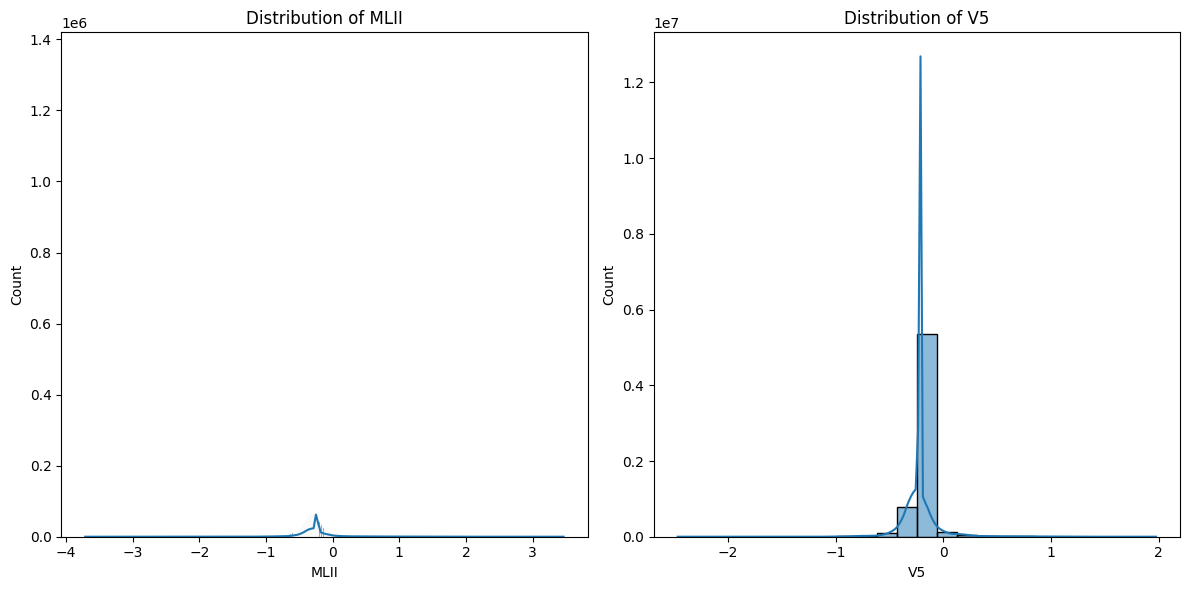

In [16]:
plt.figure(figsize=(12,6))  # Creates a figure with a specified width and height (12 by 6 inches)

plt.subplot(1,2,1)  # Adds the first subplot in a 1-row, 2-column layout
sns.histplot(df['MLII'], kde=True)  # Plots a histogram with a KDE (smooth curve) for the 'MLII' column
plt.title('Distribution of MLII')  # Sets the title of the first subplot

plt.subplot(1,2,2)  # Adds the second subplot in the same 1-row, 2-column layout
sns.histplot(df['V5'], kde=True)  # Plots a histogram with a KDE for the 'V5' column
plt.title('Distribution of V5')  # Sets the title of the second subplot

plt.tight_layout()  # Adjusts spacing between subplots to prevent overlap
plt.show()  # Displays the plots

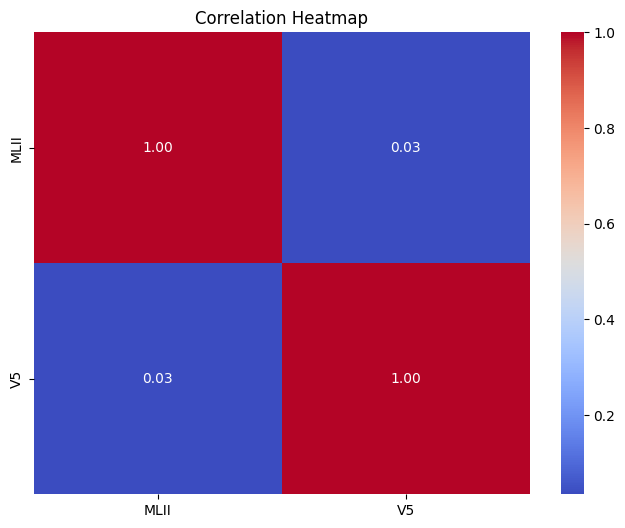

In [17]:
corr_matrix = df[['MLII', 'V5']].corr()  # Calculates the correlation matrix between 'MLII' and 'V5'

plt.figure(figsize=(8, 6))  # Creates a figure with width 8 and height 6 inches

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')  
# Plots a heatmap of the correlation matrix
# annot=True: shows the correlation values inside the cells
# cmap='coolwarm': sets the color scheme
# fmt='.2f': formats the numbers to 2 decimal places

plt.title('Correlation Heatmap')  # Sets the title of the heatmap

plt.show()  # Displays the heatmap


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


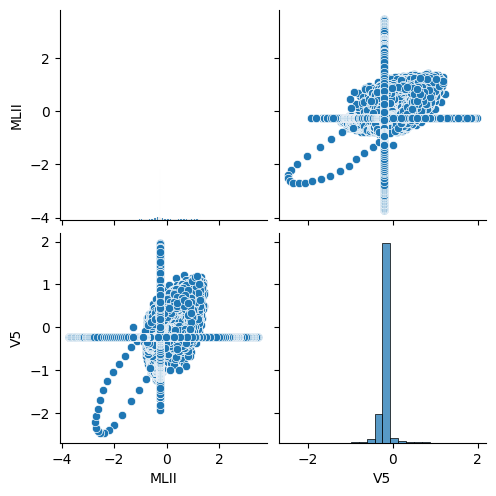

In [18]:
sns.pairplot(df[['MLII', 'V5']])  # Creates a pairplot to visualize the relationships between 'MLII' and 'V5'
plt.show()  # Displays the pairplot


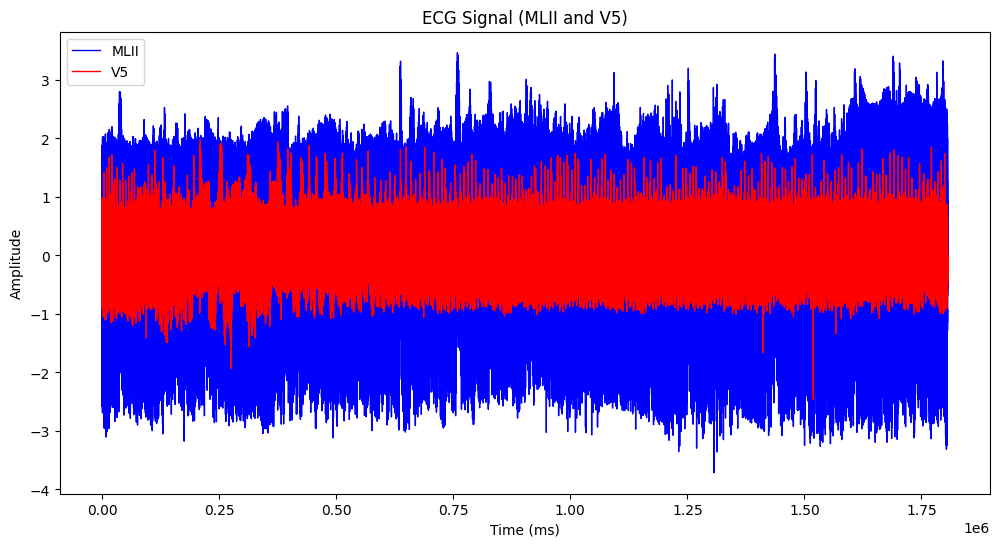

In [19]:
time = df['time_ms']  # Extracts the 'time_ms' column, which represents the time (in milliseconds)
mlii = df['MLII']     # Extracts the 'MLII' signal column (ECG signal from the MLII lead)
v5 = df['V5']         # Extracts the 'V5' signal column (ECG signal from the V5 lead)

plt.figure(figsize=(12,6))  # Creates a figure with a size of 12 inches wide and 6 inches tall

plt.plot(time, mlii, label='MLII', color='b', linewidth=1)  # Plots the MLII signal vs time (blue line)
plt.plot(time, v5, label='V5', color='r', linewidth=1)      # Plots the V5 signal vs time (red line)

plt.title('ECG Signal (MLII and V5)')  # Sets the title of the plot
plt.xlabel('Time (ms)')  # Sets the x-axis label to represent time in milliseconds
plt.ylabel('Amplitude')  # Sets the y-axis label to represent the signal's amplitude

plt.legend()  # Adds a legend to the plot, showing which line is for MLII and which is for V5

plt.show()  # Displays the plot

# Time Domain :

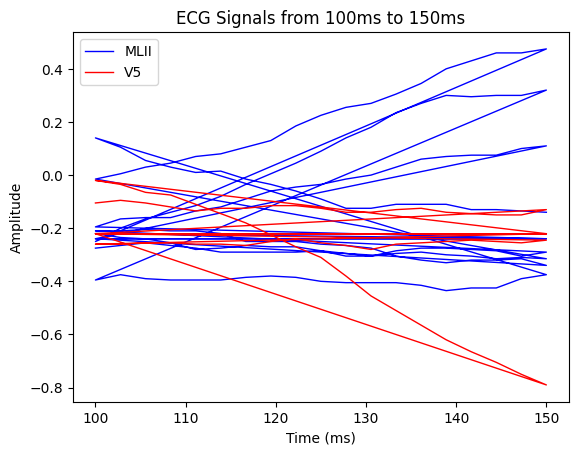

In [20]:
time_start = 100 # Specifies the start time (100 milliseconds)
time_end = 150    # Specifies the end time (200 milliseconds)

df_time_segment = df[(df['time_ms'] >= time_start) & (df['time_ms'] <= time_end)]  
# Filters the DataFrame to get rows where 'time_ms' is between time_start (1000 ms) and time_end (2000 ms)

plt.plot(df_time_segment['time_ms'], df_time_segment['MLII'], label='MLII', color='b', linewidth=1)  
# Plots the MLII signal from the filtered time segment (blue line)

plt.plot(df_time_segment['time_ms'], df_time_segment['V5'], label='V5', color='r', linewidth=1)  
# Plots the V5 signal from the filtered time segment (red line)

plt.xlabel('Time (ms)')  # Sets the x-axis label to represent time in milliseconds
plt.ylabel('Amplitude')  # Sets the y-axis label to represent the signal's amplitude
plt.title(f'ECG Signals from {time_start}ms to {time_end}ms')  # Title of the plot showing the time range
plt.legend()  # Adds a legend to show which line corresponds to MLII and V5

plt.show()  # Displays the plot

# Frequency Domain:

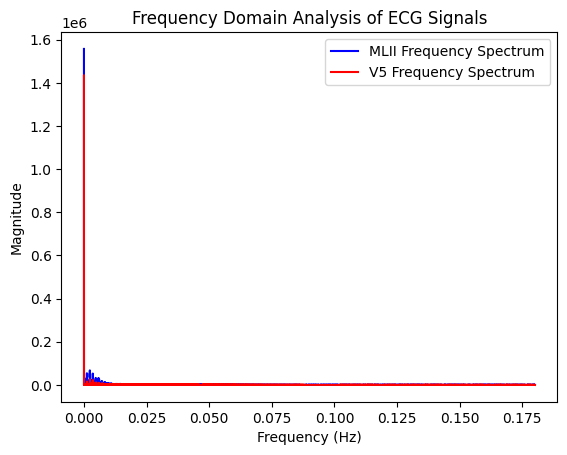

In [21]:
ml_fft = np.fft.fft(df['MLII'])  # Computes the Fast Fourier Transform (FFT) of the 'MLII' signal
v5_fft = np.fft.fft(df['V5'])    # Computes the FFT of the 'V5' signal

n = len(df['time_ms'])  # Gets the number of data points in the time series (the length of the 'time_ms' column)
sampling_rate = 1 / (df['time_ms'][1] - df['time_ms'][0])  # Calculates the sampling rate (samples per second)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)  # Calculates the frequencies corresponding to the FFT result

plt.plot(frequencies[:n // 2], np.abs(ml_fft)[:n // 2], label='MLII Frequency Spectrum', color='b')  
# Plots the frequency spectrum of the 'MLII' signal (only positive frequencies, hence [:n//2])
plt.plot(frequencies[:n // 2], np.abs(v5_fft)[:n // 2], label='V5 Frequency Spectrum', color='r')  
# Plots the frequency spectrum of the 'V5' signal (only positive frequencies, hence [:n//2])

plt.xlabel('Frequency (Hz)')  # Sets the x-axis label to represent frequency in Hertz
plt.ylabel('Magnitude')  # Sets the y-axis label to represent the magnitude of the frequency components
plt.title('Frequency Domain Analysis of ECG Signals')  # Sets the title of the plot
plt.legend()  # Adds a legend to distinguish between MLII and V5 frequency spectra

plt.show()  # Displays the plot

## Test To Frequency

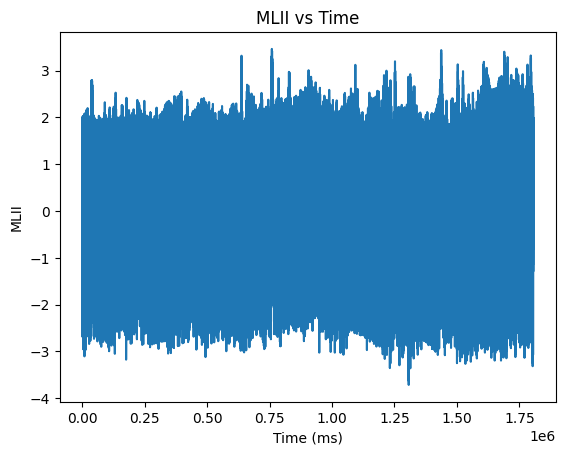

In [22]:
plt.plot(df['time_ms'], df['MLII'])  # Plotting the 'MLII' column against the 'time_ms' column from the DataFrame

# Adding labels for the axes and a title for clarity
plt.xlabel('Time (ms)')  # Labeling the x-axis (Time in milliseconds)
plt.ylabel('MLII')  # Labeling the y-axis (MLII values)
plt.title('MLII vs Time')  # Adding a title to the plot

# Displaying the plot
plt.show()  # Showing the plot in a separate window

## Frequency Spectrum of Cleaned ECG Signals (MLII & V5)



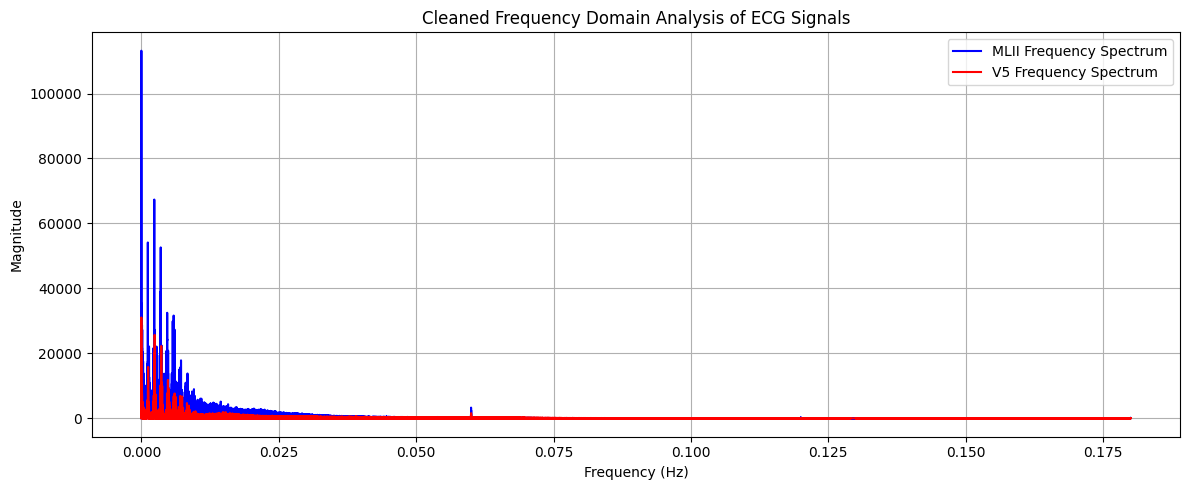

In [23]:
# Cleaning the signals by removing their mean
ml_clean = df['MLII'] - df['MLII'].mean()
v5_clean = df['V5'] - df['V5'].mean()

# Applying FFT (Fast Fourier Transform) to the cleaned signals
ml_fft = np.fft.fft(ml_clean)
v5_fft = np.fft.fft(v5_clean)

# Number of data points and sampling rate
n = len(df['time_ms'])
sampling_rate = 1 / (df['time_ms'][1] - df['time_ms'][0])

# Generating the frequency bins corresponding to the FFT result
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

# Plotting the frequency spectrum
plt.figure(figsize=(12, 5))
plt.plot(frequencies[:n // 2], np.abs(ml_fft)[:n // 2], label='MLII Frequency Spectrum', color='blue')
plt.plot(frequencies[:n // 2], np.abs(v5_fft)[:n // 2], label='V5 Frequency Spectrum', color='red')

# Adding labels and title
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Cleaned Frequency Domain Analysis of ECG Signals')
plt.legend()

# Adding grid and improving layout
plt.grid(True)
plt.tight_layout()

# Displaying the plot
plt.show()


#  Low-pass filtering:
Filter ECG signals using a low-pass filter to reduce high frequencies in signals and filter data.

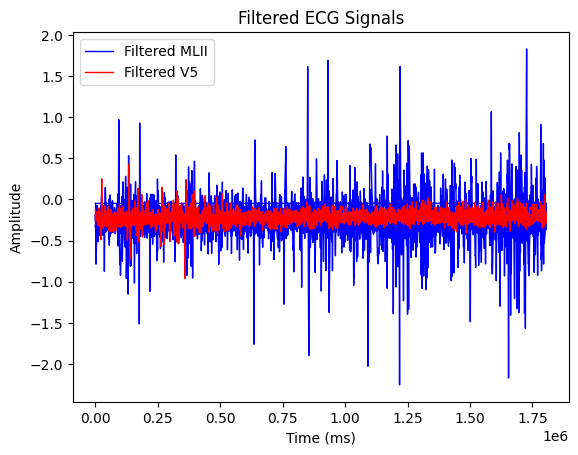

In [24]:
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

cutoff = 1.0    
fs = 1000  
b, a = butter_lowpass(cutoff, fs)

ml_filtered = filtfilt(b, a, df['MLII'])
v5_filtered = filtfilt(b, a, df['V5'])

plt.plot(df['time_ms'], ml_filtered, label='Filtered MLII', color='b', linewidth=1)
plt.plot(df['time_ms'], v5_filtered, label='Filtered V5', color='r', linewidth=1)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Filtered ECG Signals')
plt.legend()
plt.show()


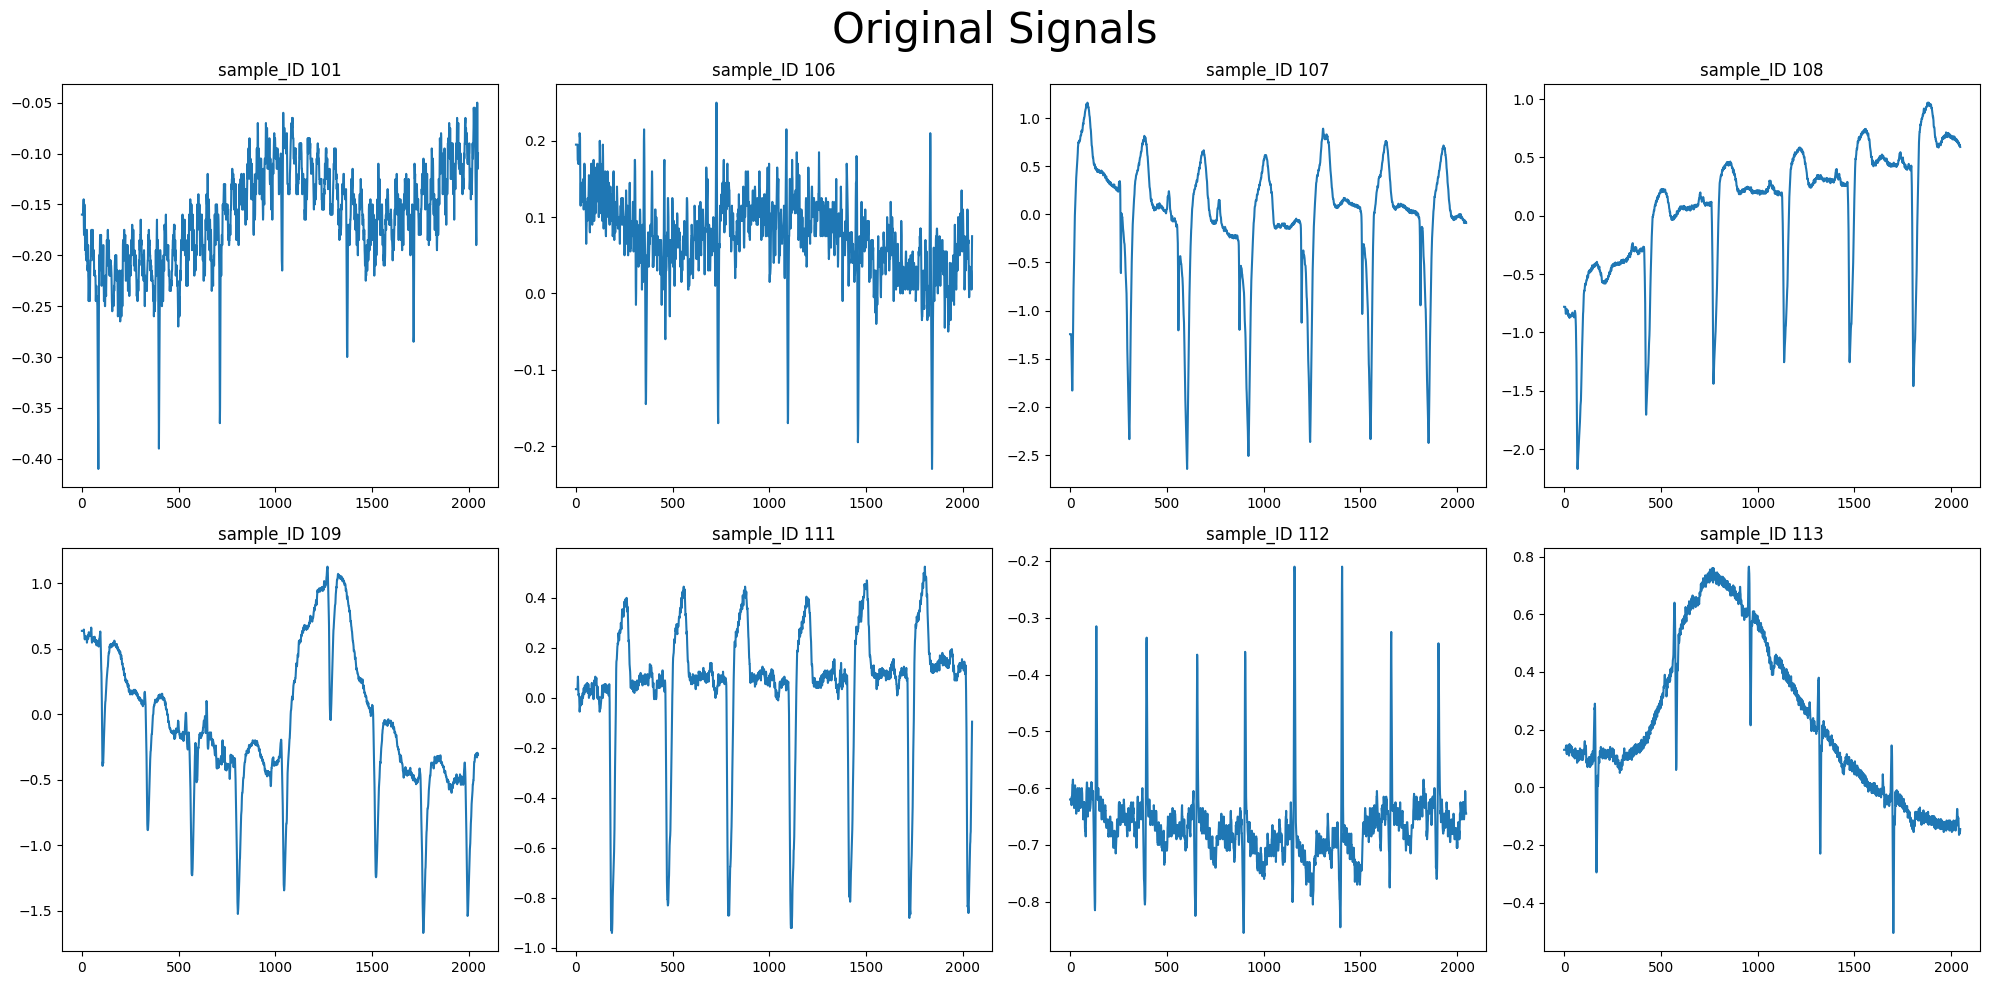

In [25]:
data_li = [101,106,107,108,109,111,112,113]  # List containing sample IDs.
path_li=[]  # Empty list to store the file paths of CSV files.
for data in data_li:  # Loop through each sample ID in data_li.
    PATH = f"/kaggle/input/mit-bih-arrhythmia-database-modern-2023/{data}.csv"  # Create the file path for each CSV based on the sample ID.
    path_li.append(PATH)  # Add the generated file path to path_li.
def plot_original(path):  # Function to read CSV data and plot original signals.
    train_df = pd.read_csv(path)  # Read the CSV file into a DataFrame.
    train_X = train_df[['time_ms','MLII','V1']]  # Extract the columns 'time_ms', 'MLII', and 'V1'.
    x = []  # Empty list to store time data.
    for i in range(2048):  # Loop to create a time range for plotting.
        x.append(i)  # Add values 0 to 2047 to the time list.
    y = train_X[:2048]['V1'].to_list()  # Extract the first 2048 values from the 'V1' column.

    return x ,y  # Return the time data and the signal values.

signals_li=[]  # Empty list to store the signals for each sample.
for PATH in path_li:  # Loop through each file path in path_li.
    idx, signal = plot_original(PATH)  # Call the plot_original function to get the time and signal data.
    signals_li.append((idx,signal))  # Store the time and signal data as a tuple in signals_li.

fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Create a 2x4 subplot grid with specified figure size.

axs[0, 0].plot(signals_li[0][0], signals_li[0][1])  # Plot the first signal on the first subplot.
axs[0, 1].plot(signals_li[1][0], signals_li[1][1])  # Plot the second signal on the second subplot.
axs[0, 2].plot(signals_li[2][0], signals_li[2][1])  # Plot the third signal on the third subplot.
axs[0, 3].plot(signals_li[3][0], signals_li[3][1])  # Plot the fourth signal on the fourth subplot.
axs[1, 0].plot(signals_li[4][0], signals_li[4][1])  # Plot the fifth signal on the fifth subplot.
axs[1, 1].plot(signals_li[5][0], signals_li[5][1])  # Plot the sixth signal on the sixth subplot.
axs[1, 2].plot(signals_li[6][0], signals_li[6][1])  # Plot the seventh signal on the seventh subplot.
axs[1, 3].plot(signals_li[7][0], signals_li[7][1])  # Plot the eighth signal on the eighth subplot.

axs[0, 0].set_title(f'sample_ID {data_li[0]}')  # Set the title of the first subplot using the sample ID.
axs[0, 1].set_title(f'sample_ID {data_li[1]}')  # Set the title of the second subplot using the sample ID.
axs[0, 2].set_title(f'sample_ID {data_li[2]}')  # Set the title of the third subplot using the sample ID.
axs[0, 3].set_title(f'sample_ID {data_li[3]}')  # Set the title of the fourth subplot using the sample ID.
axs[1, 0].set_title(f'sample_ID {data_li[4]}')  # Set the title of the fifth subplot using the sample ID.
axs[1, 1].set_title(f'sample_ID {data_li[5]}')  # Set the title of the sixth subplot using the sample ID.
axs[1, 2].set_title(f'sample_ID {data_li[6]}')  # Set the title of the seventh subplot using the sample ID.
axs[1, 3].set_title(f'sample_ID {data_li[7]}')  # Set the title of the eighth subplot using the sample ID.

fig.suptitle('Original Signals', fontsize=30)  # Set the main title for the entire figure.

plt.tight_layout()  # Adjust the layout to prevent overlapping subplots.

plt.show()  # Display the figure with the plotted signals.


In [26]:
patient106 = pd.read_csv('/kaggle/input/mit-bih-arrhythmia-database-modern-2023/106.csv', index_col=0)
patient106

,time_ms,MLII,V1
0,0.000000e+00,-0.310,0.195
1,2.777778e+00,-0.310,0.195
2,5.555556e+00,-0.310,0.195
3,8.333333e+00,-0.310,0.195
4,1.111111e+01,-0.310,0.195
...,...,...,...
649995,1.805542e+06,1.355,0.025
649996,1.805544e+06,1.040,0.135
649997,1.805547e+06,0.635,0.265
649998,1.805550e+06,0.265,0.405


In [27]:
# Get only the "main" EKG lead, which is known as "lead II"
main_ekg_lead = patient106['MLII']
main_ekg_lead

0        -0.310
1        -0.310
2        -0.310
3        -0.310
4        -0.310
          ...  
649995    1.355
649996    1.040
649997    0.635
649998    0.265
649999    0.000
Name: MLII, Length: 650000, dtype: float64

Text(0.5, 1.0, "Patient 106's Entire 30-minute EKG")

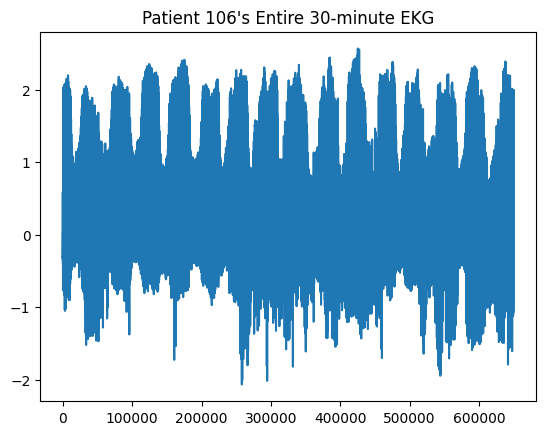

In [28]:
# Plot the whole, 30-minute EKG
main_ekg_lead.plot()
plt.title('Patient 106\'s Entire 30-minute EKG')

# Smooth the Signal with a Median Filter



We will smooth just the first 4 heartbeats in order to better illustrate how the filter works.




Text(0.5, 1.0, 'First 3 Heartbeats from Patient 106')

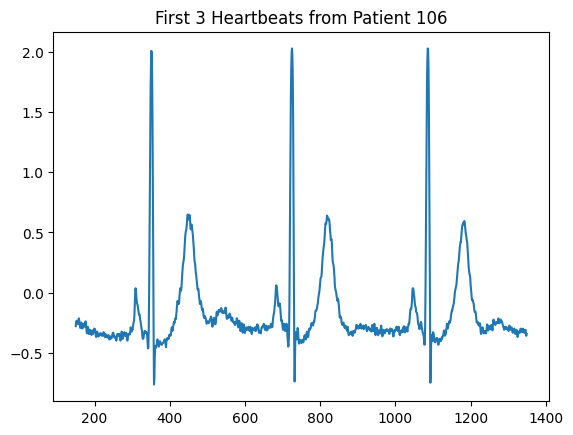

In [29]:
# Get the first 3 hearbeats
first_3_heartbeats = main_ekg_lead[150:1350]

# Plot the heartbeats for visual comparison to smoothed version
first_3_heartbeats.plot()
plt.title('First 3 Heartbeats from Patient 106')

Text(0.5, 1.0, 'Somewhat Smoothed Electrocardiogram from Patient 106')

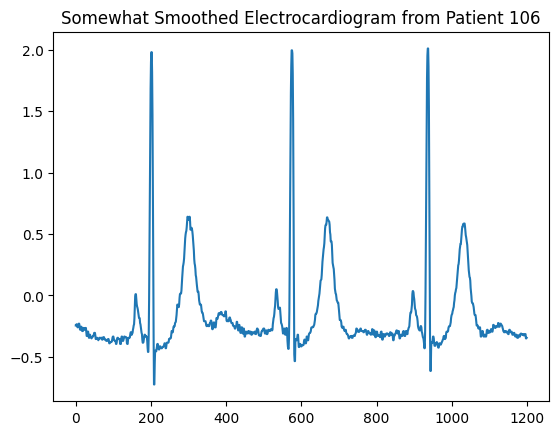

In [30]:
# Run the EKG through a median filter
smoothed_ekg = scipy.signal.medfilt(first_3_heartbeats)

# Convert the smoothed EKG to a Pandas Series to make it easily plottable
smoothed_ekg = pd.Series(smoothed_ekg)

smoothed_ekg.plot()
plt.title('Somewhat Smoothed Electrocardiogram from Patient 106')

The median filter above didn't smooth the graph that well, so let's re-run the filter with a bigger window¶


Text(0.5, 1.0, 'Even More Smoothed Electrocardiogram from Patient 106')

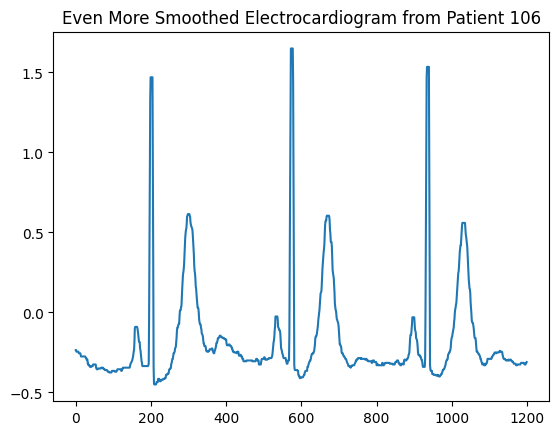

In [31]:
# Run the EKG through a median filter with a window size of 11 (instead of the default, which is 3)
smoothed_ekg = scipy.signal.medfilt(first_3_heartbeats, kernel_size=11)

# Convert the smoothed EKG to a Pandas Series to make it easily plottable
smoothed_ekg = pd.Series(smoothed_ekg)

smoothed_ekg.plot()
plt.title('Even More Smoothed Electrocardiogram from Patient 106')

This version of the graph is much smoother now. Note, however, that we lost some height from the sharpest peaks, which went from about 2.0 in height to 1.5. This is one of the drawbacks to median filters.
